Missing values:
 Driver ID                 0
Speed                     0
Acceleration              0
Steering Angle            0
Braking                   0
Lane Position             0
Time of Day               0
Road Type                 0
Distance Traveled (km)    0
Weather Conditions        0
Event                     0
Traffic Density           0
dtype: int64

Unique target classes (Event): [1 0]
Accuracy: 0.5045

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.53      0.52      5037
           1       0.50      0.48      0.49      4963

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000


Confusion Matrix:
 [[2668 2369]
 [2586 2377]]


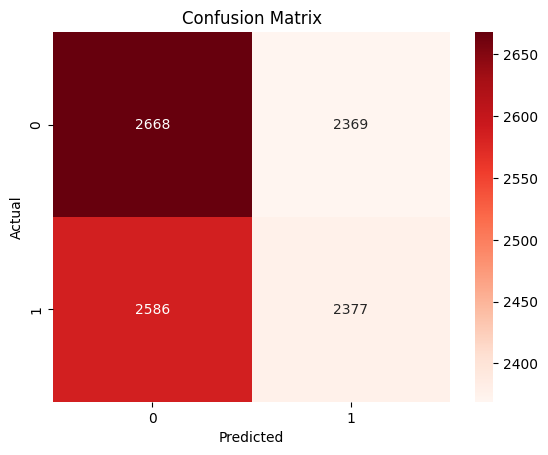


Feature Importances:
                      Feature  Importance
2             Steering Angle    0.204440
0                      Speed    0.204117
1               Acceleration    0.203790
4     Distance Traveled (km)    0.203239
3                    Braking    0.021789
11         Time of Day_Night    0.010825
17  Weather Conditions_Snowy    0.010741
9        Time of Day_Evening    0.010714
7        Lane Position_Right    0.010466
8      Time of Day_Afternoon    0.010332
5       Lane Position_Center    0.010314
16  Weather Conditions_Rainy    0.010292
10       Time of Day_Morning    0.010219
19       Traffic Density_Low    0.010164
20  Traffic Density_Moderate    0.010049
12            Road Type_City    0.010008
6         Lane Position_Left    0.009912
13         Road Type_Highway    0.009848
14           Road Type_Rural    0.009819
15  Weather Conditions_Clear    0.009778
18      Traffic Density_High    0.009145


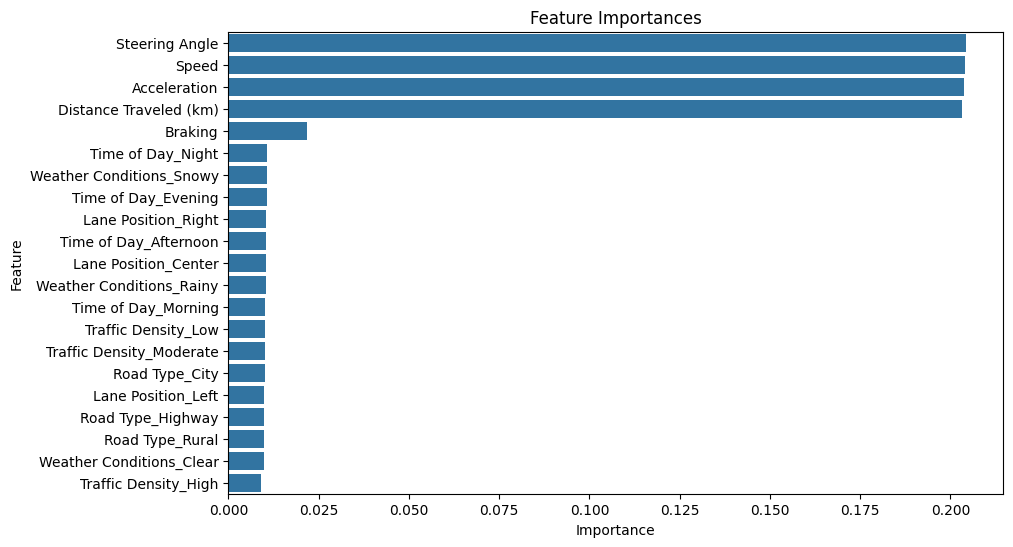

In [6]:
# model.ipynb

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import gzip

# Step 2: Load the dataset
df = pd.read_csv("data/driving_data.csv")

# Step 3: Data Preprocessing
# Checking for missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Step 4: Feature Engineering
# Check unique target classes
print("\nUnique target classes (Event):", df['Event'].unique())

# List of categorical columns to encode
categorical_cols = ['Lane Position', 'Time of Day', 'Road Type', 'Weather Conditions', 'Traffic Density']

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Get the list of feature names before scaling
feature_names = df_encoded.drop(columns=['Event', 'Driver ID']).columns.tolist()

# Step 5: Define Features (X) and Target (y)
X = df_encoded.drop(columns=['Event', 'Driver ID'])  # Drop the target and non-predictive columns
y = df_encoded['Event']  # Target is the 'Event' column

# Optional: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Capture the feature names after scaling
scaled_feature_names = feature_names  # Feature names are the same after scaling

# Step 6: Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Model Evaluation
y_pred = model.predict(X_test)

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot confusion matrix as heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 9: Save the trained model with compression using joblib and gzip
# Save model with compression using joblib + gzip
with gzip.open('driving_behavior_model.pkl.gz', 'wb') as f:
    joblib.dump(model, f)

# Save the scaler for later use with compression
with gzip.open('scaler.pkl.gz', 'wb') as f:
    joblib.dump(scaler, f)

# Optionally, print the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their corresponding importance
feature_importance_df = pd.DataFrame({
    'Feature': scaled_feature_names,
    'Importance': feature_importances
})

# Sort by importance in descending order and print top features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importance_df)

# Save the feature importance dataframe to a CSV (optional)
feature_importance_df.to_csv("feature_importance.csv", index=False)

# Optional: Plot feature importances as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importances")
plt.show()
